In [1]:
# Problem Statement
# Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression 
# using Deep Neural network. Use Boston House price prediction dataset.

# goal is to predict the median value of owner-occupied homes in thousands of dollars

In [2]:
# Importing libraries
# Data analysis and visualization
# setting up your environment to perform data analysis, visualization, and deep learning tasks using TensorFlow

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Importing libraries
# This cell imports additional libraries for preprocessing and evaluation
# Preprocessing and evaluation

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load data
# This cell loads the Boston housing dataset using TensorFlow's built-in dataset loading functionality.

(X_train , Y_train), (X_test , Y_test) = tf.keras.datasets.boston_housing.load_data(
                                            path = 'boston_housing_npz',
                                            test_split = 0.2,
                                            seed = 42
                                        )

In [5]:
# Exploratory Data Analysis
# Initial Observation
# Checking the data shape and type

(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (Y_train.shape, type(Y_train)), (Y_test.shape, type(Y_test)),

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [6]:
# This cell converts the training data (X_train) and training labels (y_train) from numpy arrays to pandas DataFrames.
# Converting Data to DataFrame 
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(Y_train)

# Preview the training data
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [7]:
# View summary of datasets

X_train_df.info()
print('_'*40)
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [8]:
# distribution of numerical feature values across the samples

X_train_df.describe() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# Preprocessing
# performs preprocessing steps on the data before training the model
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Model, Predict, Evaluation
# Reserve data for validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((363, 12), (41, 12), (363,), (41,))

In [11]:
# This cell defines, compiles, and trains a neural network model for the Boston housing price prediction problem.

# Creating the Model and Optimizing the Learning Rate
# learning rate = 0.01, batch_size = 32, dense_layers = 2, 
# hidden_units for Dense_1 layer= 10, hidden_units for Dense_2 layer = 100
# Set random seed
tf.random.set_seed(42)

# Building the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
  tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
  tf.keras.layers.Dense(units=1, name='Prediction')
])

# Compiling the model
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics = ['mse']
)

# Training the model
history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val)
)

Epoch 1/50


C:\Users\Aditya Padwal\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 376.4267 - mse: 376.4267 - val_loss: 121.8335 - val_mse: 121.8335
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.0171 - mse: 81.0171 - val_loss: 72.6853 - val_mse: 72.6853
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.5533 - mse: 53.5533 - val_loss: 58.5510 - val_mse: 58.5510
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.5371 - mse: 47.5371 - val_loss: 53.8599 - val_mse: 53.8599
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8094 - mse: 43.8094 - val_loss: 48.2720 - val_mse: 48.2720
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.8578 - mse: 39.8578 - val_loss: 41.8442 - val_mse: 41.8442
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.0312 - mse: 36.0312 - val_loss: 36.0601 - val_mse: 36.0601
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.9647 - mse: 32.9647 - val_loss: 31.2773 - val_mse: 31.2773
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [12]:
# Model Evaluation
# Preview the mean value of training and validation data
Y_train.mean(), Y_val.mean()

(22.235537, 24.89756)

In [13]:
# Evaluate the model on the test data
# evaluates the trained model on the test data and prints the evaluation metrics

print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, Y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")

Evaluation on Test data 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.7646 - mse: 24.7646 

Model loss on test set: 27.24951171875
Model mean squared error on test set: 27.25


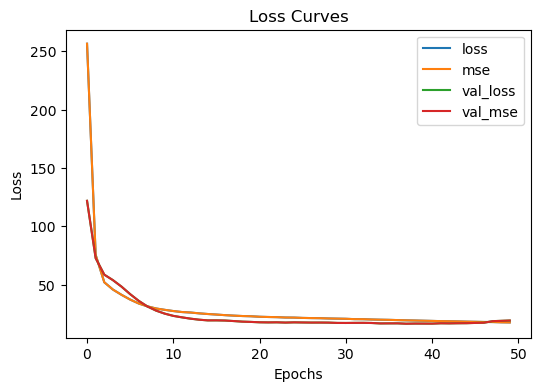

In [14]:
# Plot the loss curves
# This cell plots the loss curves during the training process.
# you can visualize how the loss (mean squared error) changes over epochs during the training process. 
# This visualization helps in understanding the model's training progress and whether it's converging or overfitting

pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

In [15]:
# Model Prediction
Y_pred = model.predict(X_test)

# View the first prediction
Y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([20.781565], dtype=float32)

C:\Users\Aditya Padwal\AppData\Local\Temp\ipykernel_2168\124548510.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Ideal line')


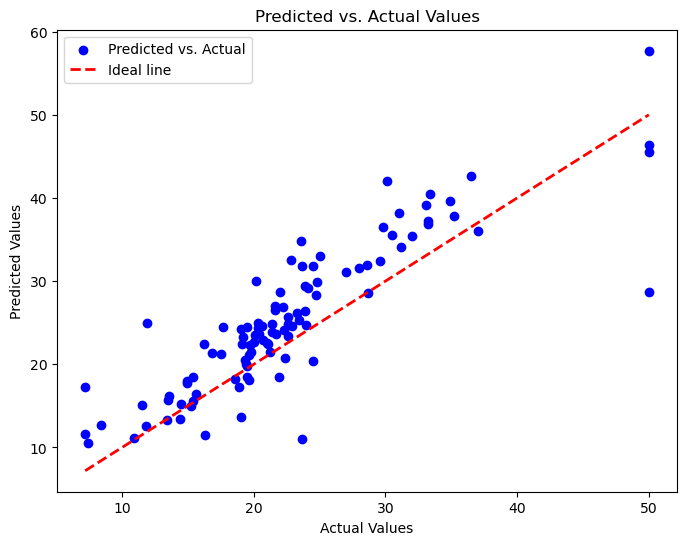

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()